**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/Amazon Sale Report.csv')

**Data Investigation and Cleaning**

In [ ]:
# shape of the data
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70940 entries, 0 to 70939
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               70940 non-null  int64  
 1   Order ID            70940 non-null  object 
 2   Date                70940 non-null  object 
 3   Status              70940 non-null  object 
 4   Fulfilment          70940 non-null  object 
 5   Sales Channel       70940 non-null  object 
 6   ship-service-level  70940 non-null  object 
 7   Category            70940 non-null  object 
 8   Size                70940 non-null  object 
 9   Courier Status      70940 non-null  object 
 10  Qty                 70940 non-null  int64  
 11  currency            66696 non-null  object 
 12  Amount              66695 non-null  float64
 13  ship-city           70922 non-null  object 
 14  ship-state          70922 non-null  object 
 15  ship-postal-code    70922 non-null  float64
 16  ship

In [ ]:
# dropping columns New and Pendings
df.drop(['New', 'PendingS'], axis = 1, inplace = True)

In [ ]:
# checking result
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
# Dropping the index columns

df.drop(['index', 'Order ID'], axis = 1, inplace = True)

In [ ]:
# changing date to Datatime

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# checking result
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 70940 entries, 0 to 70939
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
70940 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 554.3 KB


**Checking for and handling missing values**

In [ ]:
# changing columns name

df = df.rename(columns={'ship-service-level': 'ship_service_level'})
df = df.rename(columns={'ship-city': 'ship_city'})
df = df.rename(columns={'ship-state': 'ship_state'})
df = df.rename(columns={'ship-postal-code': 'ship_postal_code'})
df = df.rename(columns={'ship-country': 'ship_country'})
df = df.rename(columns={'fulfilled-by': 'fulfilled_by'})


In [ ]:
# check result
df.columns

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship_service_level',
       'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount',
       'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'B2B',
       'fulfilled_by'],
      dtype='object')

In [ ]:
# missing values
df.isnull().sum()

,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship_service_level,0
Category,0
Size,0
Courier Status,0
Qty,0
currency,4244


In [ ]:
# handling missing values

df['ship_service_level'] = df['ship_service_level'].fillna(value = 'Not Provided')
df['ship_city'] = df['ship_city'].fillna(value = 'Not Provided')
df['ship_state'] = df['ship_state'].fillna(value = 'Not Provided')
df['ship_postal_code'] = df['ship_postal_code'].fillna(value = '0')
df['ship_country'] = df['ship_country'].fillna(value = 'Not Provided')
df['fulfilled_by'] = df['fulfilled_by'].fillna(value = 'Not Provided')
df['currency'] = df['currency'].fillna(value = 'INR')
df['Amount'] = df['Amount'].fillna(value = '0')

In [ ]:
# check results
df.isnull().sum()

,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship_service_level,0
Category,0
Size,0
Courier Status,0
Qty,0
currency,0


In [ ]:
df['Amount'].value_counts()

,count
Amount,
0,4245
399.0,3677
771.0,1875
788.0,1617
487.0,1437
...,...
835.24,1
1000.0,1
1051.0,1


In [ ]:
# changing datatype
df['Amount'] = df['Amount'].astype('float')
df['ship_postal_code'] = df['ship_postal_code'].astype('int')

**Check for and handling outliers**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70940 entries, 0 to 70939
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                70940 non-null  datetime64[ns]
 1   Status              70940 non-null  object        
 2   Fulfilment          70940 non-null  object        
 3   Sales Channel       70940 non-null  object        
 4   ship_service_level  70940 non-null  object        
 5   Category            70940 non-null  object        
 6   Size                70940 non-null  object        
 7   Courier Status      70940 non-null  object        
 8   Qty                 70940 non-null  int64         
 9   currency            70940 non-null  object        
 10  Amount              70940 non-null  float64       
 11  ship_city           70940 non-null  object        
 12  ship_state          70940 non-null  object        
 13  ship_postal_code    70940 non-null  int64     

In [ ]:
# extracting the numerical columns

num_cols = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
num_cols.head()

,Qty,Amount,ship_postal_code
0,0,647.62,400081
1,1,406.00,560085
2,1,329.00,410210
3,0,753.33,605008
4,1,574.00,600073


In [ ]:
# extracting categorical columns

cat_cols = df.select_dtypes(include = ['object', 'category', 'bool'])
cat_cols.head()

,Status,Fulfilment,Sales Channel,ship_service_level,Category,Size,Courier Status,currency,ship_city,ship_state,ship_country,B2B,fulfilled_by
0,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,INR,MUMBAI,MAHARASHTRA,IN,False,Easy Ship
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,INR,BENGALURU,KARNATAKA,IN,False,Easy Ship
2,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,INR,NAVI MUMBAI,MAHARASHTRA,IN,True,Not Provided
3,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,INR,PUDUCHERRY,PUDUCHERRY,IN,False,Easy Ship
4,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,INR,CHENNAI,TAMIL NADU,IN,False,Not Provided


In [ ]:
df['currency'].unique()

array(['INR', 'I'], dtype=object)

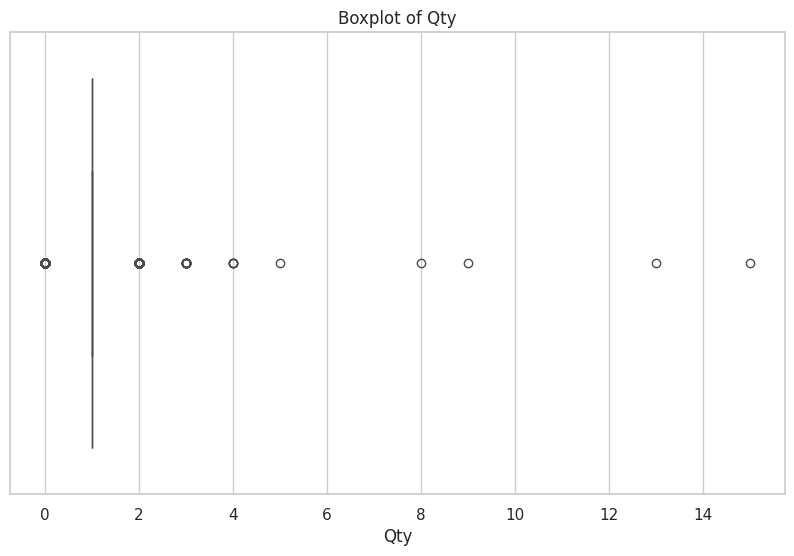

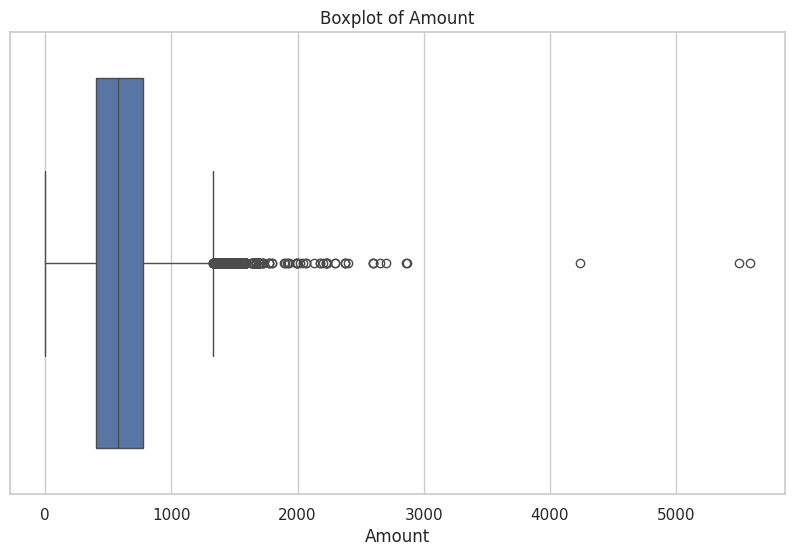

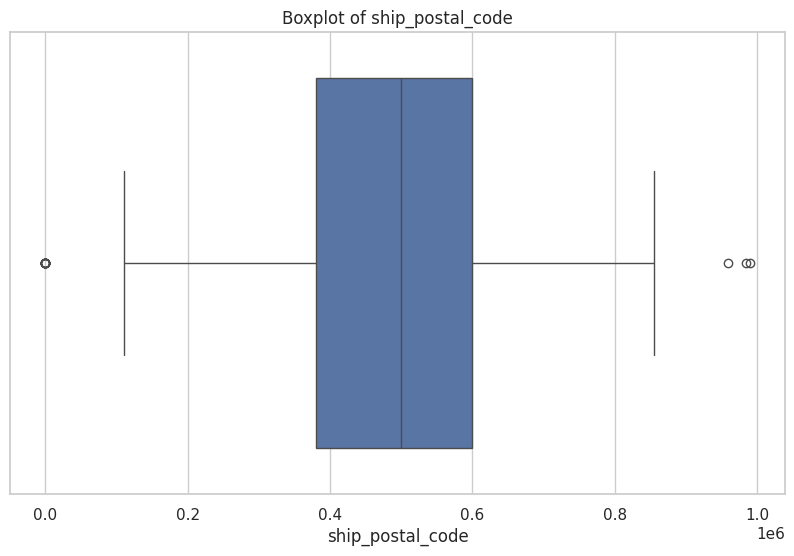

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a boxplot for each numeric column
for column in num_cols.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=num_cols[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
# capping outliers using Percentile (Qunatile Capping)

for col in num_cols.columns:
    lower_cap = num_cols[col].quantile(0.05)  # 5th percentile
    upper_cap = num_cols[col].quantile(0.95)  # 95th percentile
    num_cols[col] = num_cols[col].clip(lower=lower_cap, upper=upper_cap)


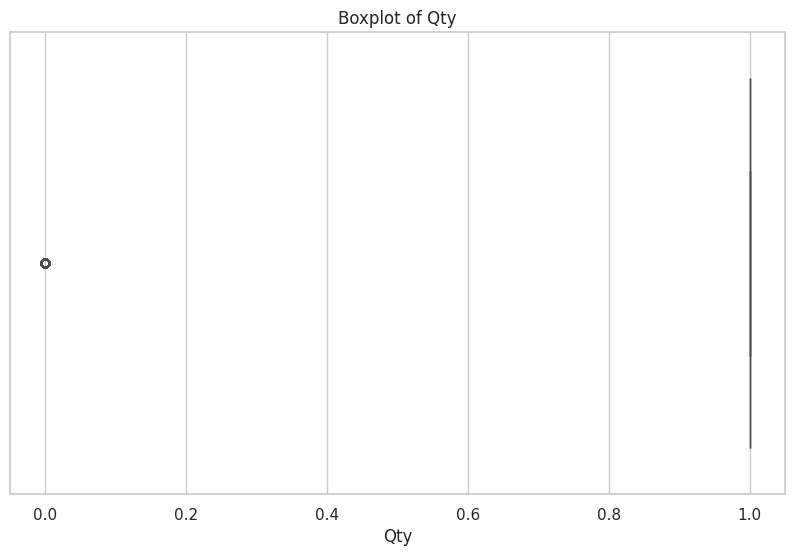

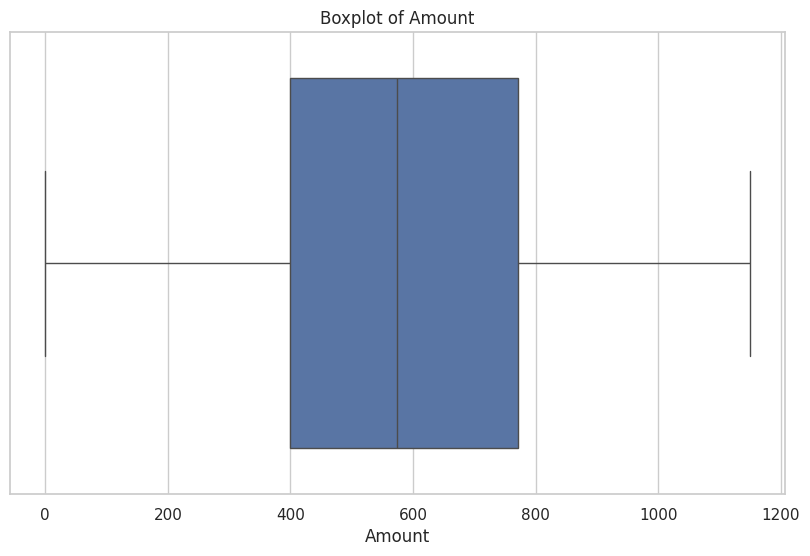

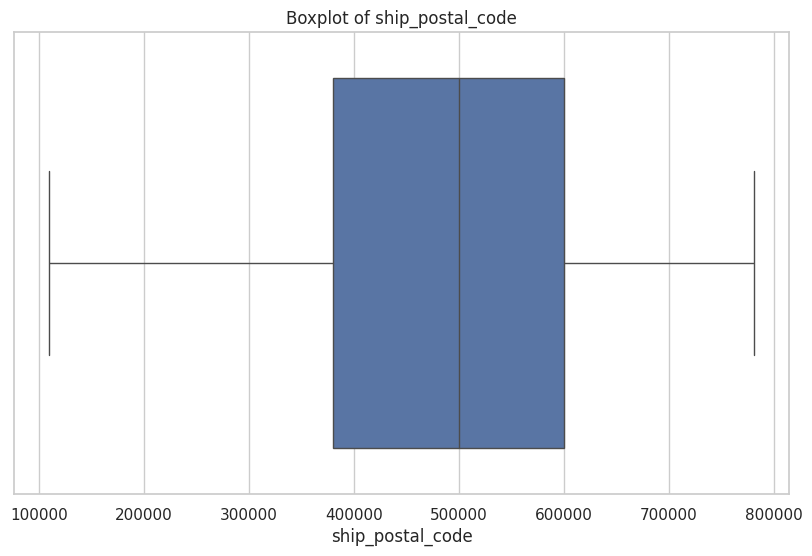

In [ ]:
# checking result

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a boxplot for each numeric column
for column in num_cols.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=num_cols[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

**Data Validation**

In [ ]:
num_cols.value_counts()

Qty  Amount  ship_postal_code
0    0.0     781007              261
1    1149.0  781007              240
     399.0   781007              193
     1149.0  110091              184
0    0.0     110091              179
                                ... 
1    474.0   400610                1
             400612                1
             402125                1
             403001                1
     560.0   471001                1
Name: count, Length: 49090, dtype: int64

In [ ]:
# joining categorical and numerical columns with .join

df1 = num_cols.join(cat_cols)

In [ ]:
# checking for result

df1.head()

,Qty,Amount,ship_postal_code,Status,Fulfilment,Sales Channel,ship_service_level,Category,Size,Courier Status,currency,ship_city,ship_state,ship_country,B2B,fulfilled_by
0,0,647.62,400081,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,INR,MUMBAI,MAHARASHTRA,IN,False,Easy Ship
1,1,406.00,560085,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,INR,BENGALURU,KARNATAKA,IN,False,Easy Ship
2,1,329.00,410210,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,INR,NAVI MUMBAI,MAHARASHTRA,IN,True,Not Provided
3,0,753.33,605008,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,INR,PUDUCHERRY,PUDUCHERRY,IN,False,Easy Ship
4,1,574.00,600073,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,INR,CHENNAI,TAMIL NADU,IN,False,Not Provided


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70940 entries, 0 to 70939
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qty                 70940 non-null  int64  
 1   Amount              70940 non-null  float64
 2   ship_postal_code    70940 non-null  int64  
 3   Status              70940 non-null  object 
 4   Fulfilment          70940 non-null  object 
 5   Sales Channel       70940 non-null  object 
 6   ship_service_level  70940 non-null  object 
 7   Category            70940 non-null  object 
 8   Size                70940 non-null  object 
 9   Courier Status      70940 non-null  object 
 10  currency            70940 non-null  object 
 11  ship_city           70940 non-null  object 
 12  ship_state          70940 non-null  object 
 13  ship_country        70940 non-null  object 
 14  B2B                 70939 non-null  object 
 15  fulfilled_by        70940 non-null  object 
dtypes: f

In [ ]:
df1.isnull().sum()

,0
Qty,0
Amount,0
ship_postal_code,0
Status,0
Fulfilment,0
Sales Channel,0
ship_service_level,0
Category,0
Size,0
Courier Status,0


# **EXPLORATORY DATA ANALYSIS**

- UNIVARIATE ANALYSIS

In [ ]:
df1.shape

(70940, 16)

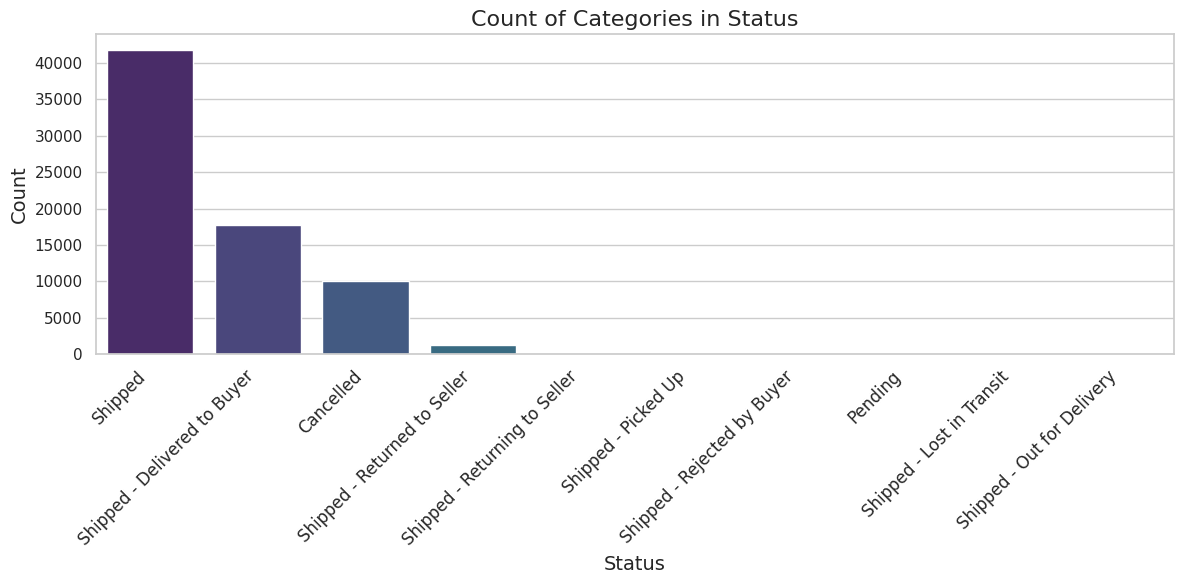

In [ ]:
# Visualizing the numerical columns in a subplot using a bar chart

# Count the occurrences of each category in the 'Status' column
status_counts = cat_cols['Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories in Status', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

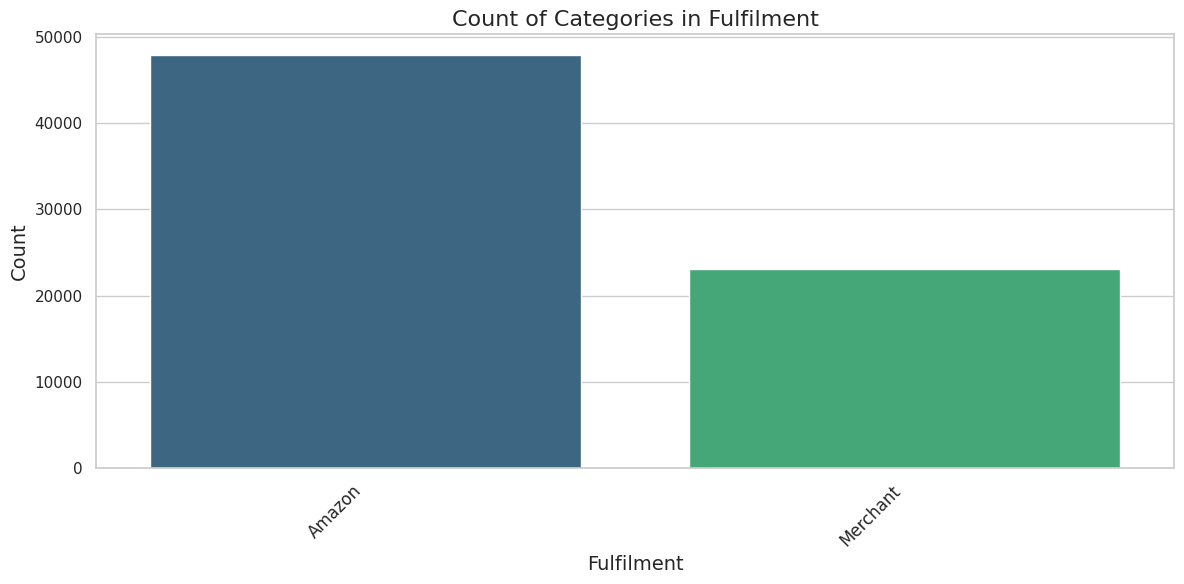

In [ ]:
# Visualizing the numerical columns in a subplot using a bar chart

# Count the occurrences of each category in the 'Status' column
status_counts = cat_cols['Fulfilment'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories in Fulfilment', fontsize=16)
plt.xlabel('Fulfilment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

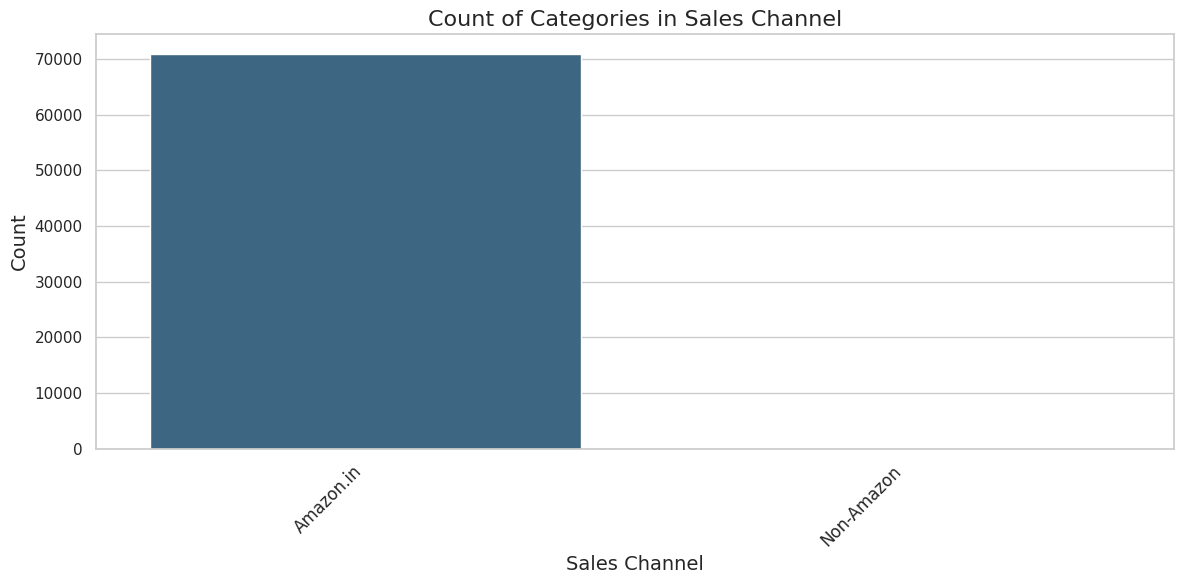

In [ ]:
# Visualizing the numerical columns in a subplot using a bar chart

status_counts = cat_cols['Sales Channel'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories in Sales Channel', fontsize=16)
plt.xlabel('Sales Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

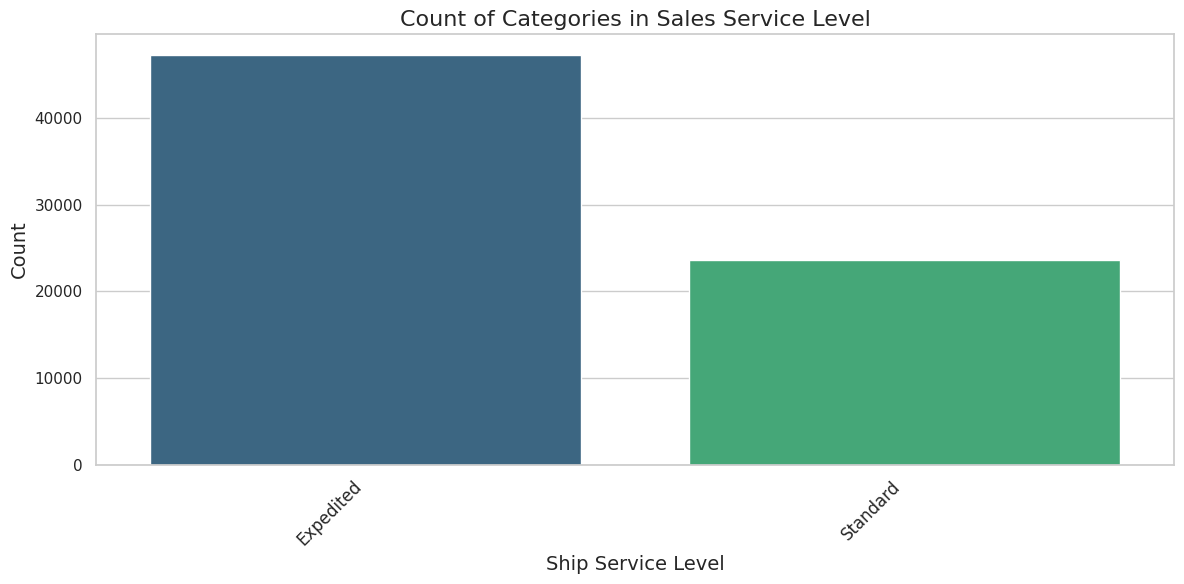

In [ ]:
# Visualizing the numerical columns in a subplot using a bar chart

# Count the occurrences of each category in the 'Status' column
status_counts = cat_cols['ship_service_level'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories in Sales Service Level', fontsize=16)
plt.xlabel('Ship Service Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

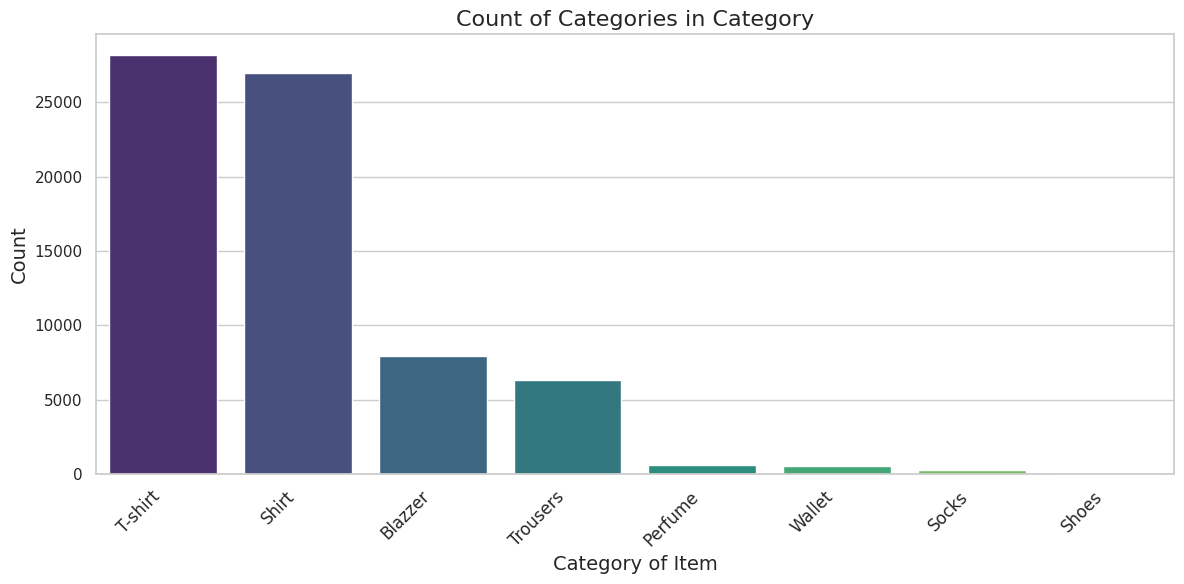

In [ ]:
# Visualizing the numerical columns in a subplot using a bar chart

# Count the occurrences of each category in the 'Status' column
status_counts = cat_cols['Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories in Category', fontsize=16)
plt.xlabel('Category of Item', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

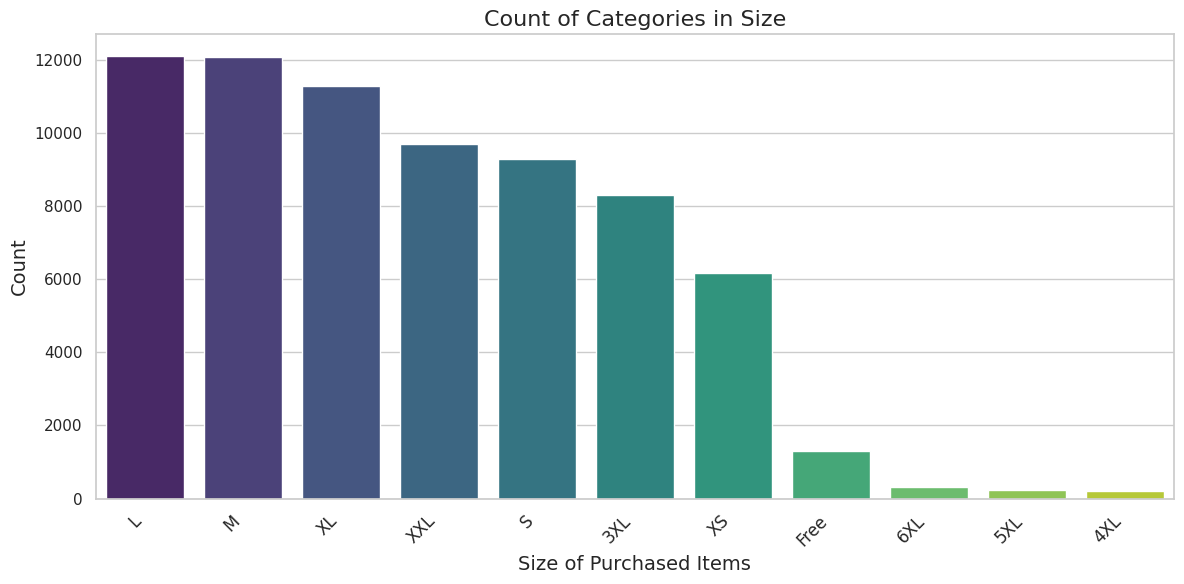

In [ ]:
# Visualizing the numerical columns in a subplot using a bar chart
# Size	0 Courier Status	0currency	0ship_city	0ship_state	0ship_country	0B2B	0fulfilled_by
# Count the occurrences of each category in the 'Status' column

# Count the occurrences of each category in the 'Status' column
status_counts = cat_cols['Size'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories in Size', fontsize=16)
plt.xlabel('Size of Purchased Items', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

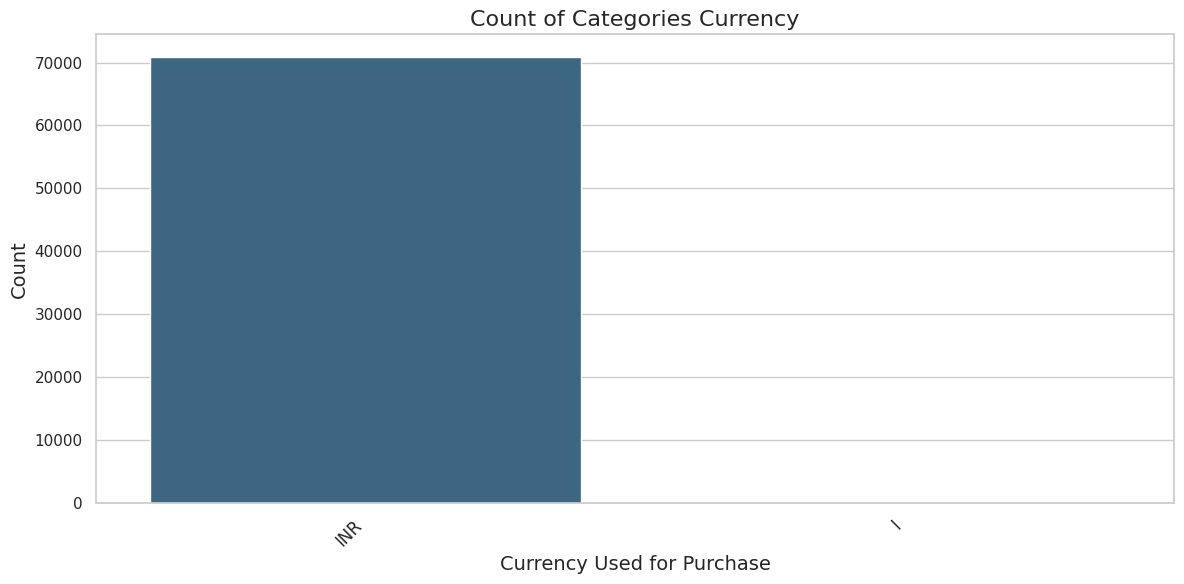

In [ ]:
# Visualizing the numerical columns in a subplot using a bar chart
# Size	0 Courier Status	0currency	0ship_city	0ship_state	0ship_country	0B2B	0fulfilled_by
# Count the occurrences of each category in the 'Status' column

# Count the occurrences of each category in the 'Status' column
status_counts = cat_cols['currency'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories Currency', fontsize=16)
plt.xlabel('Currency Used for Purchase', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

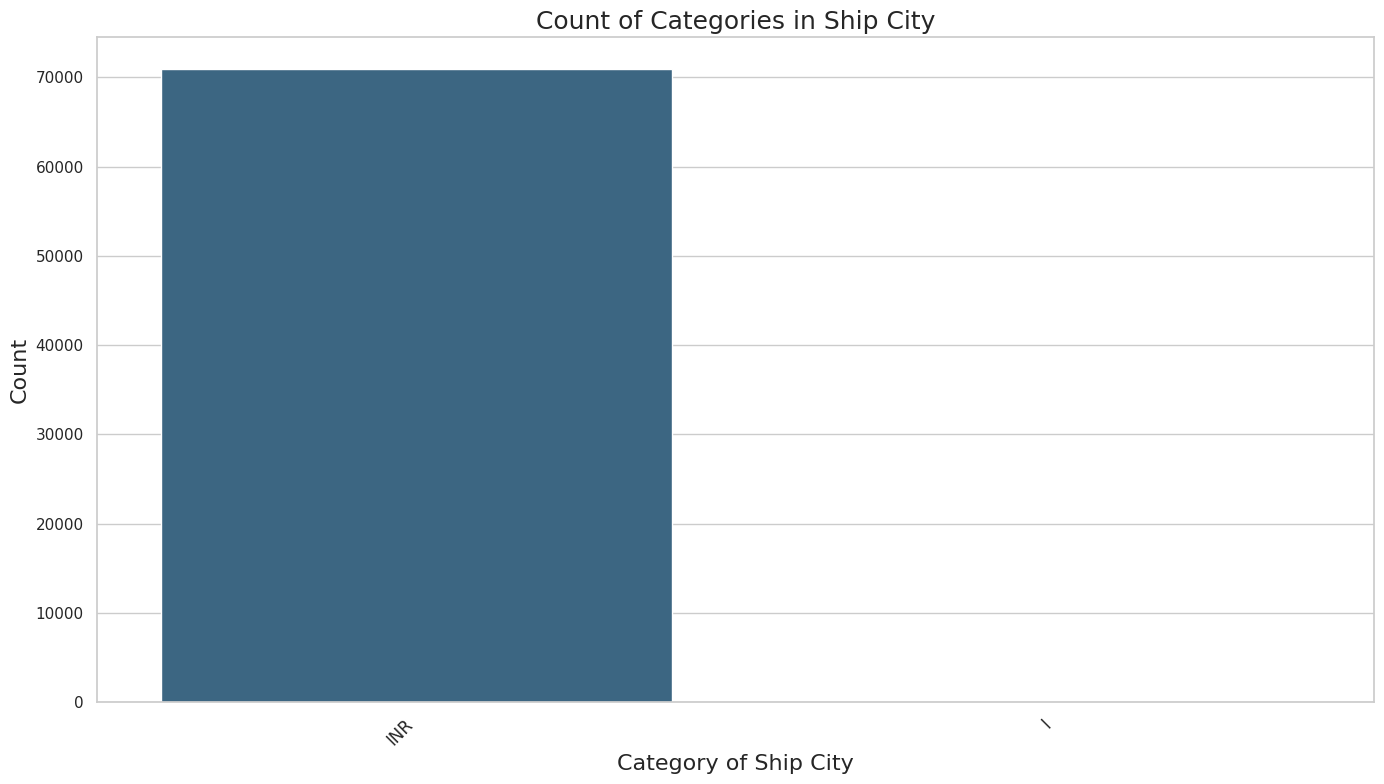

In [ ]:
# Visualizing the numerical columns in a subplot using a bar chart

# Count the occurrences of each category in the 'Status' column
top_n = 20  # Adjust this number as needed
status_counts = status_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(14, 8))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories in Ship City', fontsize=18)
plt.xlabel('Category of Ship City', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

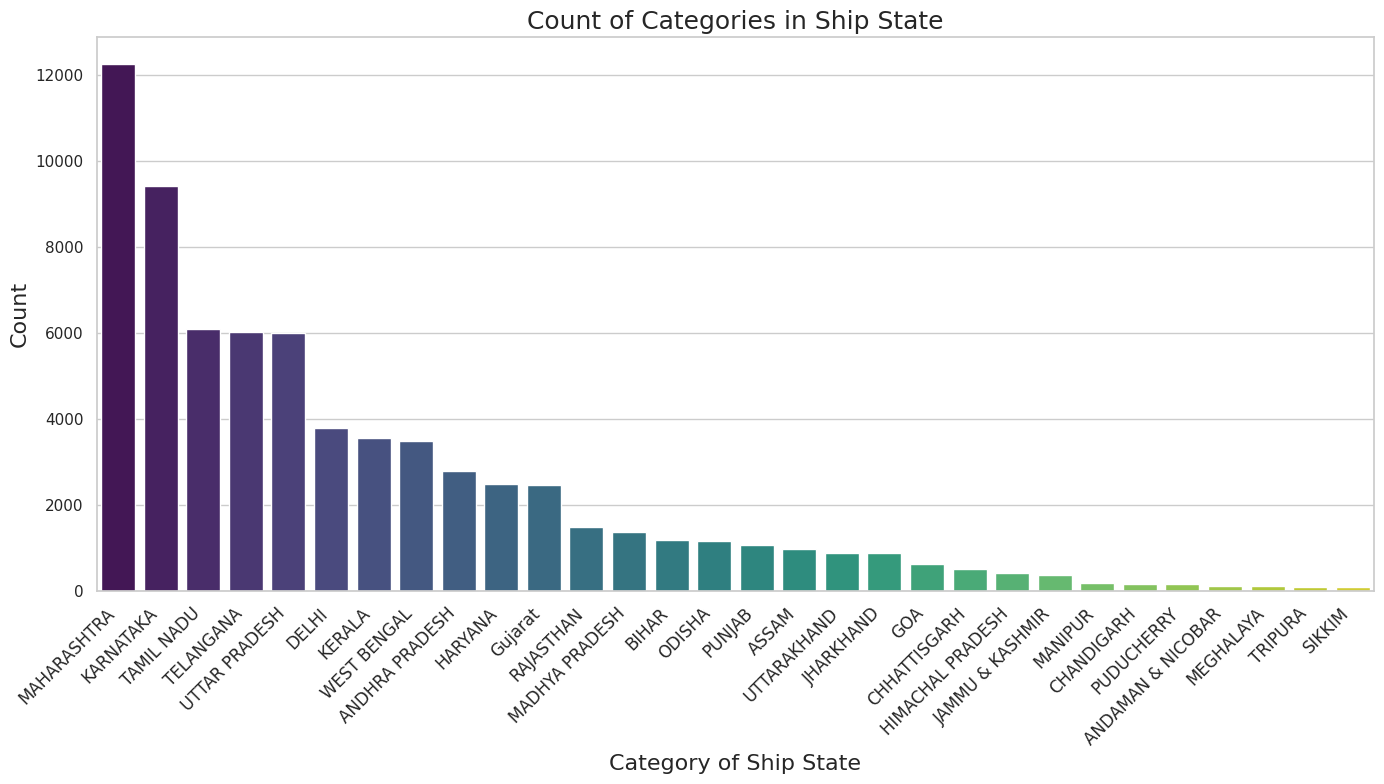

In [ ]:
status_counts = cat_cols['ship_state'].value_counts()

# Limit to the top N categories
top_n = 30  # Adjust this number as needed
status_counts = status_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(14, 8))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories in Ship State', fontsize=18)
plt.xlabel('Category of Ship State', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

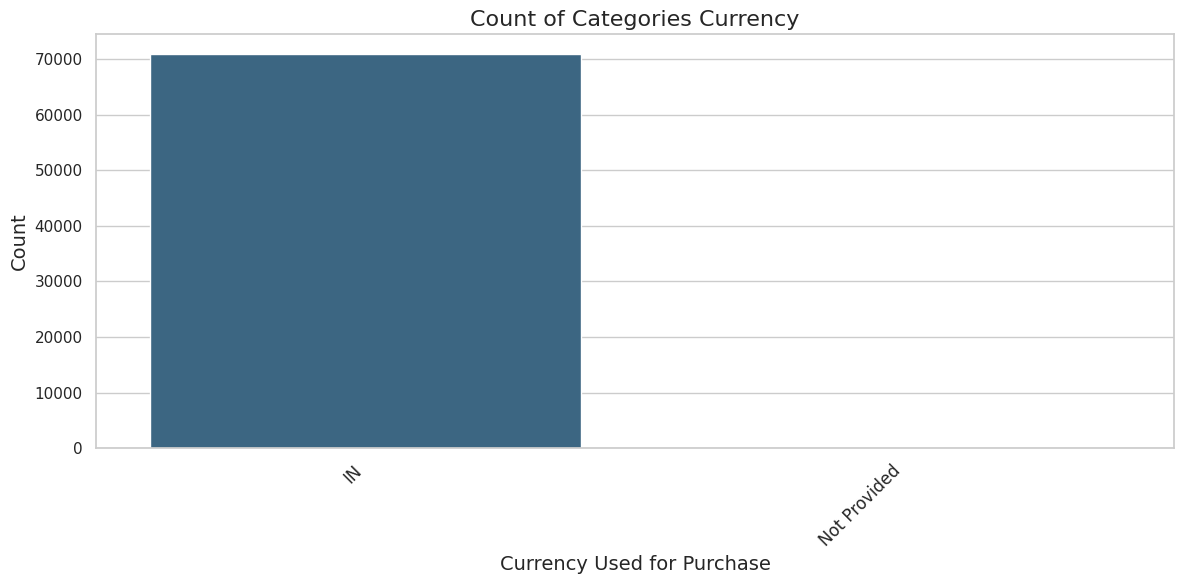

In [ ]:
# Count the occurrences of each category in the 'Status' column
status_counts = cat_cols['ship_country'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories Currency', fontsize=16)
plt.xlabel('Currency Used for Purchase', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

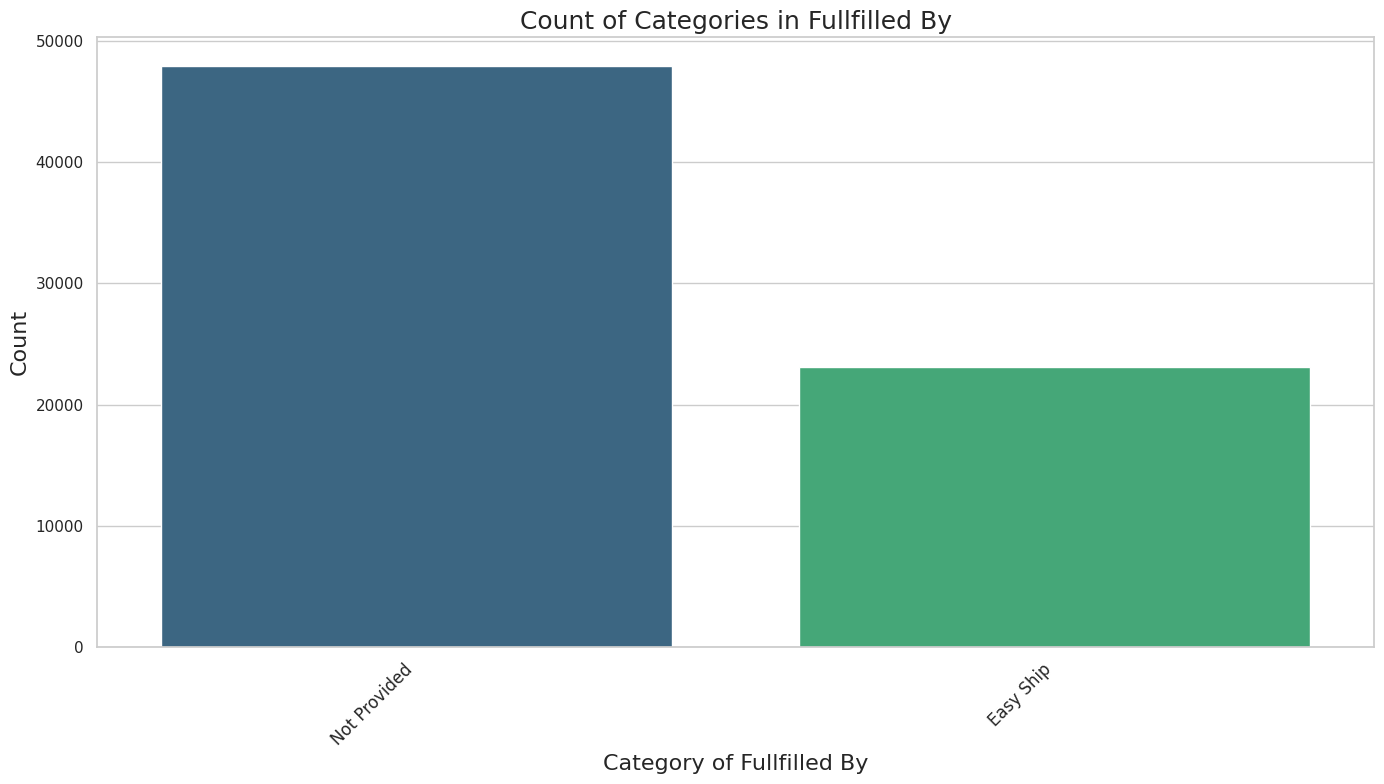

In [ ]:
status_counts = cat_cols['fulfilled_by'].value_counts()

# Limit to the top N categories
top_n = 30  # Adjust this number as needed
status_counts = status_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(14, 8))  # Increase the width of the figure
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Categories in Fullfilled By', fontsize=18)
plt.xlabel('Category of Fullfilled By', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align the labels

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

In [ ]:
num_cols.columns

Index(['Qty', 'Amount', 'ship_postal_code'], dtype='object')

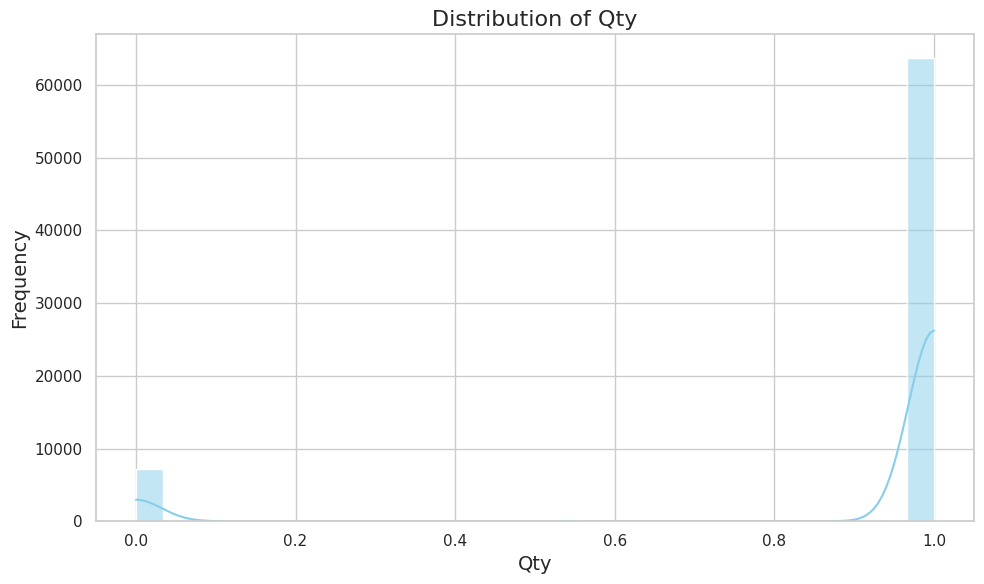

In [ ]:
# Plot a histogram for the 'Qty' column
plt.figure(figsize=(10, 6))
sns.histplot(num_cols['Qty'], kde=True, bins=30, color='skyblue')  # Add kde=True for a density plot overlay

# Add titles and labels
plt.title('Distribution of Qty', fontsize=16)
plt.xlabel('Qty', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

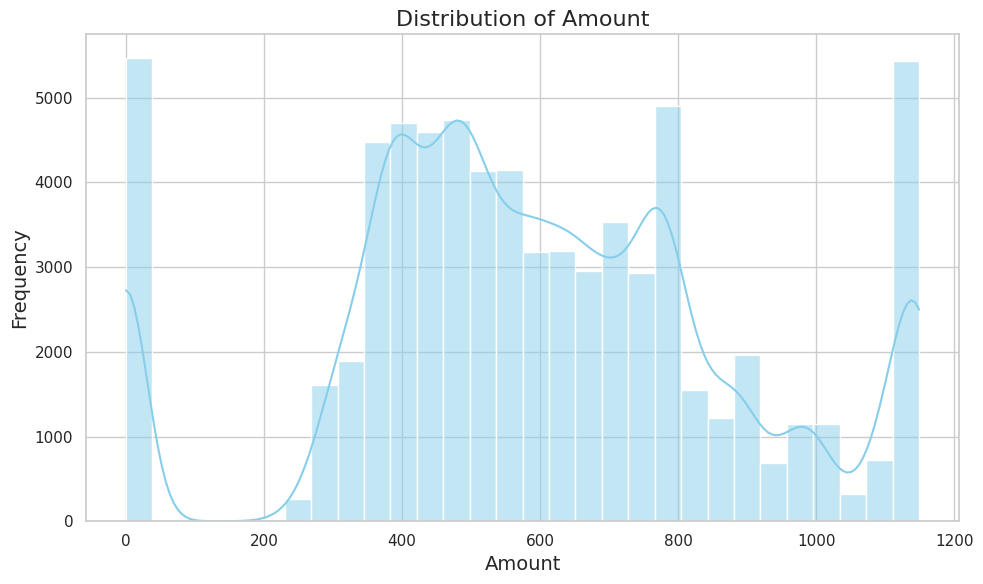

In [ ]:
# Plot a histogram for the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(num_cols['Amount'], kde=True, bins=30, color='skyblue')  # Add kde=True for a density plot overlay

# Add titles and labels
plt.title('Distribution of Amount', fontsize=16)
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Bivariate Analysis**

In [ ]:
df1.columns

Index(['Qty', 'Amount', 'ship_postal_code', 'Status', 'Fulfilment',
       'Sales Channel', 'ship_service_level', 'Category', 'Size',
       'Courier Status', 'currency', 'ship_city', 'ship_state', 'ship_country',
       'B2B', 'fulfilled_by'],
      dtype='object')

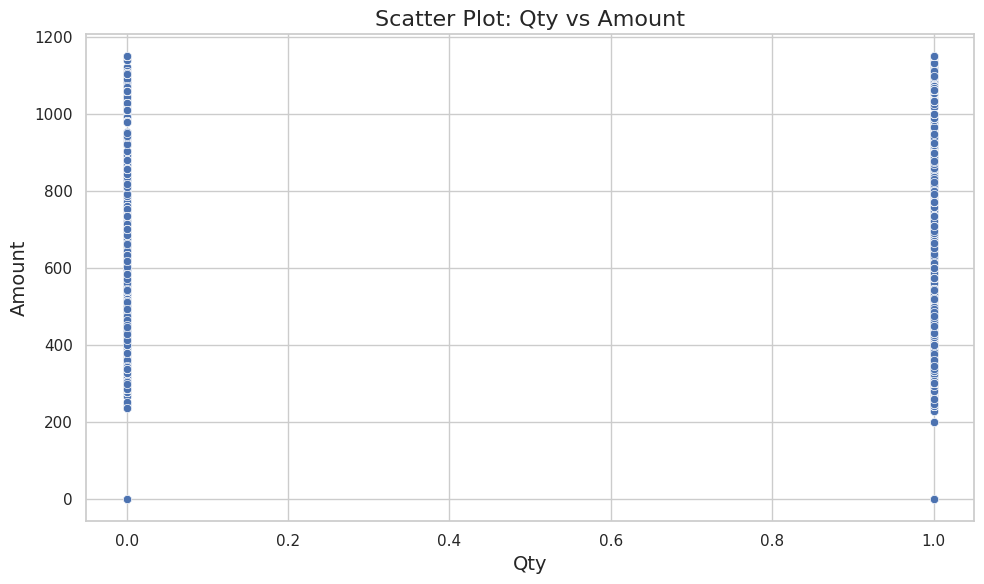

In [ ]:
# Scatter plot for 'Qty' vs 'Amount'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['Qty'], y=df1['Amount'], palette='viridis')  # Hue based on 'Status'

# Add titles and labels
plt.title('Scatter Plot: Qty vs Amount', fontsize=16)
plt.xlabel('Qty', fontsize=14)
plt.ylabel('Amount', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the Pearson correlation coefficient between 'Qty' and 'Amount'
correlation_coefficient = df1['Qty'].corr(df1['Amount'])

# Print the result
print(f'The correlation coefficient between Qty and Amount is: {correlation_coefficient:.4f}')


The correlation coefficient between Qty and Amount is: 0.3982


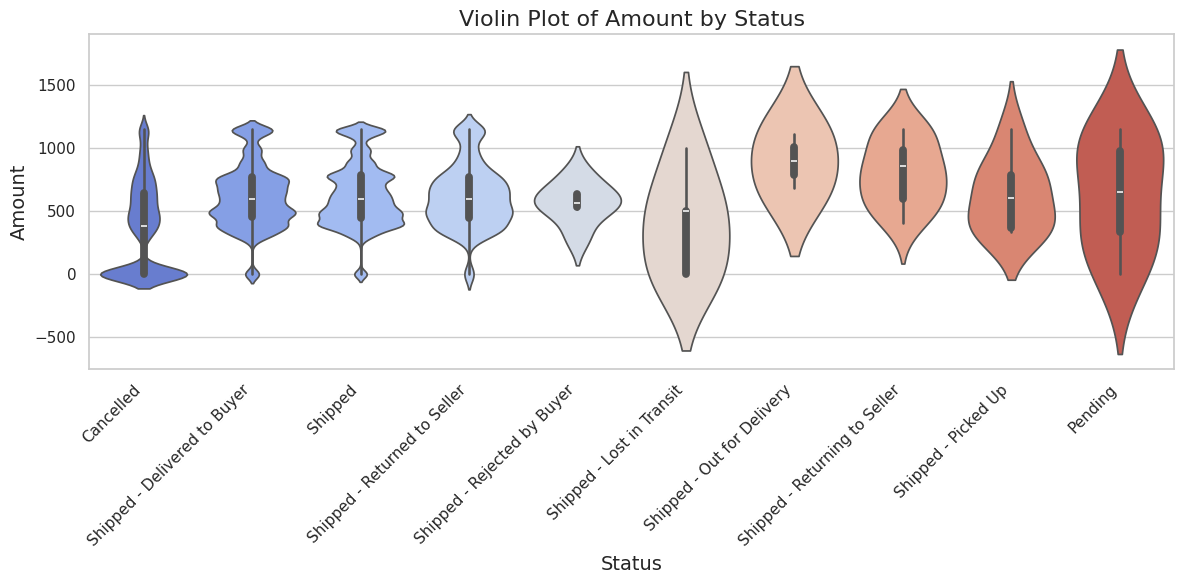

In [ ]:
# Violin plot for 'Amount' by 'Status'
plt.figure(figsize=(12, 6))
sns.violinplot(x=df1['Status'], y=df1['Amount'], palette='coolwarm')

# Add titles and labels
plt.title('Violin Plot of Amount by Status', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Amount', fontsize=14)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()


**Multivariate Analysis**

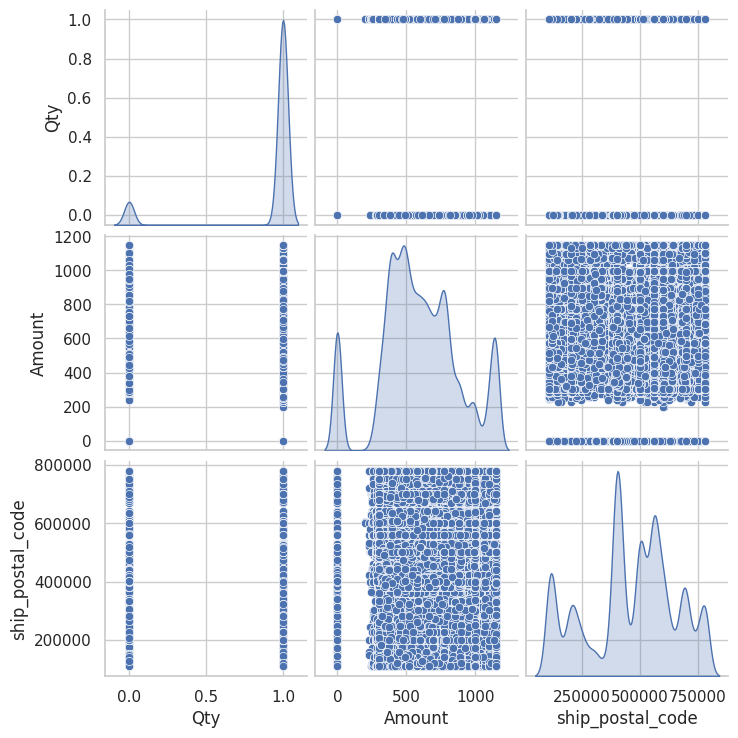

In [ ]:
sns.pairplot(df1[['Qty', 'Amount', 'ship_postal_code']], diag_kind='kde')
plt.show()


In [ ]:
group_analysis = df1.groupby(['Sales Channel', 'Status']).agg({'Qty': 'mean', 'Amount': 'mean'}).reset_index()
print(group_analysis)


   Sales Channel                         Status       Qty      Amount
0      Amazon.in                      Cancelled  0.291021  371.761252
1      Amazon.in                        Pending  0.833333  626.833333
2      Amazon.in                        Shipped  0.998826  636.348743
3      Amazon.in   Shipped - Delivered to Buyer  0.999604  622.410860
4      Amazon.in      Shipped - Lost in Transit  1.000000  399.400000
5      Amazon.in     Shipped - Out for Delivery  1.000000  897.500000
6      Amazon.in            Shipped - Picked Up  1.000000  625.375000
7      Amazon.in    Shipped - Rejected by Buyer  1.000000  566.000000
8      Amazon.in   Shipped - Returned to Seller  1.000000  621.217687
9      Amazon.in  Shipped - Returning to Seller  1.000000  797.545455
10    Non-Amazon                      Cancelled  1.000000    0.000000
11    Non-Amazon                        Shipped  1.000000    0.000000


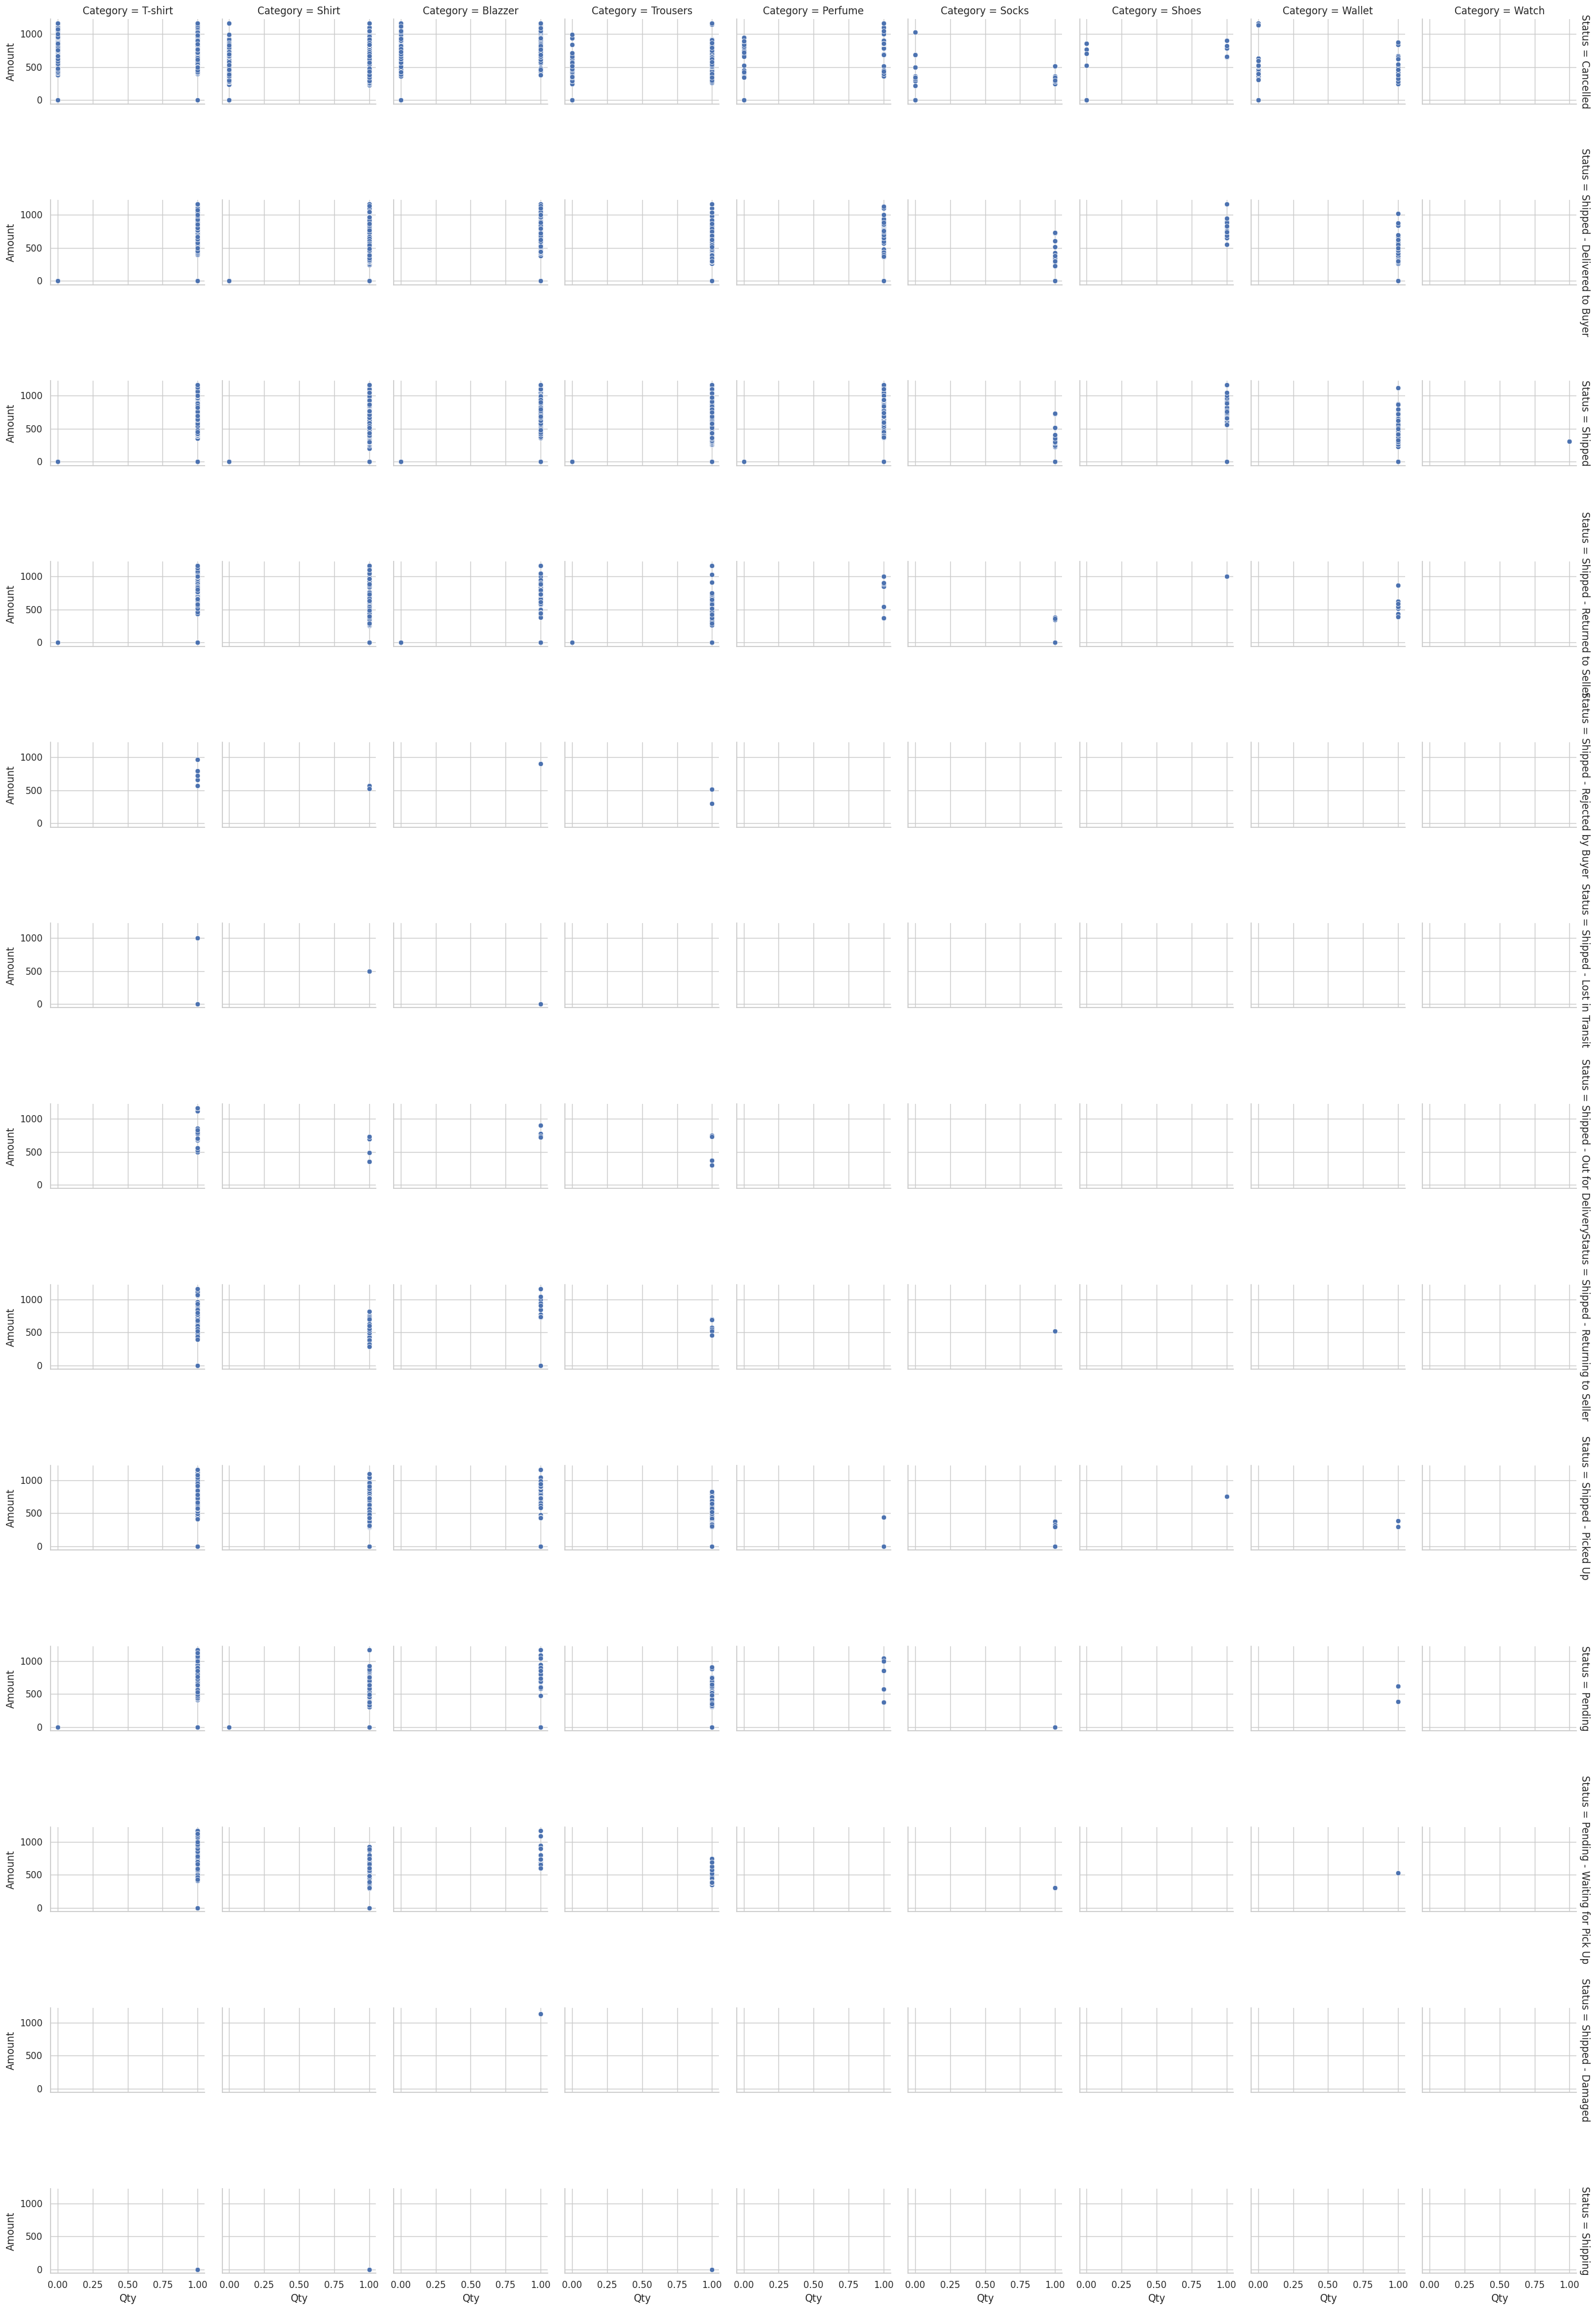

In [ ]:
g = sns.FacetGrid(df1, col='Category', row='Status', margin_titles=True)
g.map(sns.scatterplot, 'Qty', 'Amount')
plt.show()


In [ ]:
import statsmodels.api as sm

# Assuming 'Qty' and 'Sales Channel' are categorical
df = pd.get_dummies(df, columns=['Sales Channel'], drop_first=True)
X = df[['Qty'] + list(df.columns[df.columns.str.startswith('Sales Channel_')])]
y = df['Amount']

X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                 2.479e+04
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:14:34   Log-Likelihood:            -9.0400e+05
No. Observations:              128976   AIC:                         1.808e+06
Df Residuals:                  128974   BIC:                         1.808e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        247.2964      2.366    104.524      0.0